In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

In [13]:
data = pd.read_csv('pset2.csv')

In [35]:
pd.set_option("max_columns", 50)

In [51]:

data['law'] = data['primary'] + (data['secondary']*2)

In [53]:
data.head(20)

,state,year,college,beer,primary,secondary,population,unemploy,fatalities,totalvmt,precip,snow32,rural_speed,urban_speed,law
0,AL,1981,0.131424,1.00,0,0,3918.533,10.7,937,27852,4.217500,0.0,55,55,0
1,AL,1982,0.134717,1.00,0,0,3925.263,14.4,839,28516,5.620000,0.0,55,55,0
2,AL,1983,0.137939,1.01,0,0,3934.100,13.7,944,31032,6.341667,0.0,55,55,0
3,AL,1984,0.146007,1.02,0,0,3951.824,11.1,940,32961,4.188333,0.0,55,55,0
4,AL,1985,0.159058,1.06,0,0,3972.520,8.9,881,35091,4.365000,0.0,55,55,0
5,AL,1986,0.167259,1.09,0,0,3991.569,9.8,1081,34003,4.005833,0.0,55,55,0
6,AL,1987,0.167770,1.10,0,0,4015.262,7.8,1110,37426,4.658333,0.0,55,55,0
7,AL,1988,0.155521,1.10,0,0,4023.842,7.2,1023,39684,4.391667,0.0,65,55,0
8,AL,1989,0.145012,1.10,0,0,4030.219,7.0,1029,40765,5.592500,0.0,65,55,0
9,AL,1990,0.139489,1.12,0,0,4050.055,6.9,1118,42347,5.320000,0.0,65,55,0


In [60]:
years = data.pivot(index = 'year', columns = ['state'], values = ['primary'])

years = years.transpose()

def even_number_background(cell_value):

    highlight = 'background-color: darkorange;'
    default = ''

    if type(cell_value) in [float, int]:
        if cell_value  == 1:
            return highlight
    return default

years.style.applymap(even_number_background)

#years.head(50)



In [62]:
years_sec = data.pivot(index = 'year', columns = ['state'], values = ['law'])
years_sec = years_sec.transpose()

def even_number_background(cell_value):

    highlight = 'background-color: darkorange;'
    red    = 'background-color: blue;'
    default = ''
    

    if type(cell_value) in [float, int]:
        if cell_value  == 1:
            return highlight
        if cell_value ==2:
            return red
        
    return default

years_sec.style.applymap(even_number_background)

#years.head(50)


(array([ 19.,  35.,  75., 167., 255., 282., 200.,  56.,  14.,   1.]),
 array([-9.68820981, -9.47235876, -9.25650772, -9.04065667, -8.82480563,
        -8.60895458, -8.39310354, -8.17725249, -7.96140145, -7.7455504 ,
        -7.52969936]),
 <BarContainer object of 10 artists>)

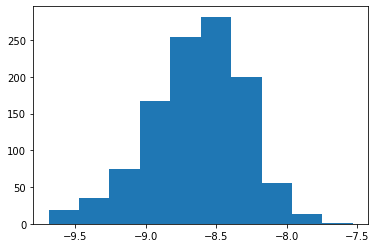

In [202]:
data['log_fatal_per_cap'] = np.log(data['fatalities']/(data['population']*1000))
plt.hist(data['log_fatal_per_cap'])

(array([ 86., 285., 331., 246., 108.,  33.,  10.,   4.,   0.,   1.]),
 array([0.06201032, 0.10949925, 0.15698818, 0.20447712, 0.25196605,
        0.29945498, 0.34694392, 0.39443285, 0.44192178, 0.48941072,
        0.53689965]),
 <BarContainer object of 10 artists>)

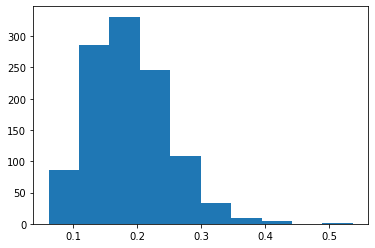

In [203]:
data['fatal_per_cap_1000'] = data['fatalities']/data['population']
plt.hist(data['fatal_per_cap_1000'])

(array([484., 366., 155.,  26.,  12.,  22.,  17.,  10.,   4.,   8.]),
 array([  63. ,  607.1, 1151.2, 1695.3, 2239.4, 2783.5, 3327.6, 3871.7,
        4415.8, 4959.9, 5504. ]),
 <BarContainer object of 10 artists>)

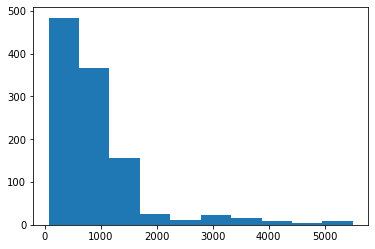

In [204]:
plt.hist(data['fatalities'])

(array([ 36.,  93.,  74., 112., 156., 256., 192., 112.,  38.,  35.]),
 array([4.14313473, 4.59014429, 5.03715386, 5.48416342, 5.93117299,
        6.37818255, 6.82519212, 7.27220168, 7.71921125, 8.16622081,
        8.61323038]),
 <BarContainer object of 10 artists>)

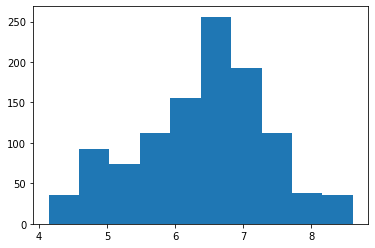

In [205]:
plt.hist(np.log(data['fatalities']))

In [233]:
data['years_post_prim'] = data['year']
df = pd.DataFrame(columns = data.columns)
data['never_treat'] = 0
n = 0
for s in sorted(list(set(list(data['state'])))):
    x = 0
    dat = data[data['state']==s]
    for y in list(set(list(data['year']))):
        if dat.iloc[22]['primary']== 0:
            dat['years_post_prim'] = dat['years_post_prim'] - 2004
            #print(dat['years_post_prim'])
            df = df.append(dat)
            break
        if dat.iloc[x]['primary']==1:
            dat['years_post_prim'] = dat['years_post_prim'] - y
            dat['never_treat'] = 1
            df = df.append(dat)
            break
        x = x+1
        n = n+1
            
#print(df)     

<ipython-input-233-09eb820fbc7e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['years_post_prim'] = dat['years_post_prim'] - y
<ipython-input-233-09eb820fbc7e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['never_treat'] = 1
<ipython-input-233-09eb820fbc7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [234]:
df['means'] = df['years_post_prim']


for y in list(set(list(df['years_post_prim']))):
    df['means'] = df['means'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 1)]['log_fatal_per_cap'].mean())
    
df['means_nopol'] = df['years_post_prim']

for y in list(set(list(df['years_post_prim']))):
    df['means_nopol'] = df['means_nopol'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 0)]['log_fatal_per_cap'].mean())
    

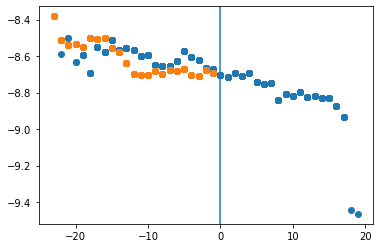

In [235]:
plt.axvline(x = 0)
plt.scatter(df[df['never_treat']==1]['years_post_prim'], df[df['never_treat']==1]['means'])
plt.scatter(df[df['never_treat']==0]['years_post_prim'], df[df['never_treat']==0]['means_nopol'])


In [236]:
df['sums'] = df['years_post_prim']


for y in list(set(list(df['years_post_prim']))):
    df['sums'] = df['sums'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 1)]['log_fatal_per_cap'].sum())
    
df['sums_nopol'] = df['years_post_prim']

for y in list(set(list(df['years_post_prim']))):
    df['sums_nopol'] = df['sums_nopol'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 0)]['log_fatal_per_cap'].sum())
    

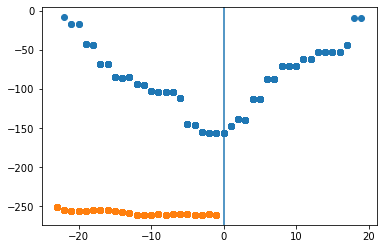

In [237]:
plt.axvline(x = 0)
plt.scatter(df[df['never_treat']==1]['years_post_prim'], df[df['never_treat']==1]['sums'])
plt.scatter(df[df['never_treat']==0]['years_post_prim'], df[df['never_treat']==0]['sums_nopol'])


In [238]:
y = ['log_fatal_per_cap_1000']
x = ['primary', 'secondary']
df['primary'] = df['primary'].astype(int)
df['secondary'] = df['secondary'].astype(int)

vals = sm.OLS(df[y], sm.add_constant(df[x]))
out = vals.fit()
print(out.summary())

                              OLS Regression Results                              
Dep. Variable:     log_fatal_per_cap_1000   R-squared:                       0.063
Model:                                OLS   Adj. R-squared:                  0.061
Method:                     Least Squares   F-statistic:                     37.02
Date:                    Fri, 20 Oct 2023   Prob (F-statistic):           2.77e-16
Time:                            16:28:28   Log-Likelihood:                -333.32
No. Observations:                    1104   AIC:                             672.6
Df Residuals:                        1101   BIC:                             687.7
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [239]:
data['years_post_sec'] = data['year']
df = pd.DataFrame(columns = data.columns)
data['never_treats'] = 0
n = 0
for s in sorted(list(set(list(data['state'])))):
    x = 0
    dat = data[data['state']==s]
    for y in list(set(list(data['year']))):
        if dat.iloc[22]['secondary']== 0:
            dat['years_post_sec'] = dat['years_post_sec'] - 2004
            #print(dat['years_post_sec'])
            df = df.append(dat)
            break
        if dat.iloc[x]['secondary']==1:
            dat['years_post_sec'] = dat['years_post_sec'] - y
            dat['never_treats'] = 1
            df = df.append(dat)
            break
        x = x+1
        n = n+1
            
#print(df)     

<ipython-input-239-410c7a04c90e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['years_post_sec'] = dat['years_post_sec'] - 2004
<ipython-input-239-410c7a04c90e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['years_post_sec'] = dat['years_post_sec'] - y
<ipython-input-239-410c7a04c90e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [240]:
df['meanss'] = df['years_post_sec']


for y in list(set(list(df['years_post_sec']))):
    df['meanss'] = df['meanss'].replace(y, df[(df['years_post_sec']==y) & (df['never_treats'] == 1)]['log_fatal_per_cap'].mean())
    
df['meanss_nopol'] = df['years_post_sec']

for y in list(set(list(df['years_post_sec']))):
    df['meanss_nopol'] = df['meanss_nopol'].replace(y, df[(df['years_post_sec']==y) & (df['never_treats'] == 0)]['log_fatal_per_cap'].mean())
    

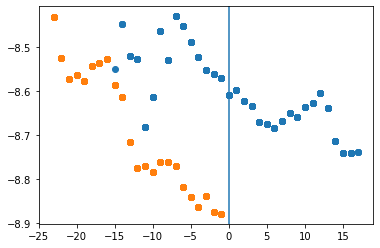

In [241]:
plt.axvline(x = 0)
plt.scatter(df[df['never_treats']==1]['years_post_sec'], df[df['never_treats']==1]['meanss'])
plt.scatter(df[df['never_treats']==0]['years_post_sec'], df[df['never_treats']==0]['meanss_nopol'])


In [242]:
df['sumss'] = df['years_post_sec']


for y in list(set(list(df['years_post_sec']))):
    df['sumss'] = df['sumss'].replace(y, df[(df['years_post_sec']==y) & (df['never_treats'] == 1)]['log_fatal_per_cap'].sum())
    
df['sumss_nopol'] = df['years_post_sec']

for y in list(set(list(df['years_post_sec']))):
    df['sumss_nopol'] = df['sumss_nopol'].replace(y, df[(df['years_post_sec']==y) & (df['never_treats'] == 0)]['log_fatal_per_cap'].sum())
    

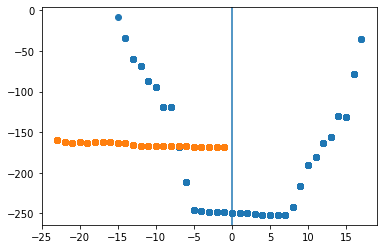

In [243]:
plt.axvline(x = 0)
plt.scatter(df[df['never_treats']==1]['years_post_sec'], df[df['never_treats']==1]['sumss'])
plt.scatter(df[df['never_treats']==0]['years_post_sec'], df[df['never_treats']==0]['sumss_nopol'])
